In [1]:
import pandas as pd
import scipy as sp
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv("train_data.csv", index_col=0, sep=",")
train_data

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,y1,y2
0,1816.0,1.0,26.08,25.44,25.44,25.58,26.14,26.16,26.16,26.24,...,-,-,-,-,-,-,-,-,26.08,26.44
1,2708.0,1.0,14.04,12.76,13.46,12.76,12.82,12.92,12.94,12.96,...,-,-,-,-,-,-,-,-,12.76,235413.64
2,1821.0,0.0,0.22,0.98,0.22,0.98,0.22,0.18,1.42,4.74,...,-,-,-,-,-,-,-,-,0.22,0.98
3,137.0,0.0,23.44,24.04,23.0,23.78,23.8,24.0,23.44,22.94,...,9.36,23.0,24.04,22.06,22.06,24.14,-,-,23.00,24.04
4,1598.0,0.0,27.62,26.82,4.0,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-6.16,-6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,162.0,0.0,18.44,18.1,19.22,18.4,18.48,18.7,18.76,18.8,...,-,-,-,-,-,-,-,-,18.44,18.68
674,2434.0,0.0,18.58,23.16,25.4,26.22,27.0,27.8,27.84,3.6,...,-,-,-,-,-,-,-,-,20.72,22.44
675,2659.0,1.0,16.82,17.58,17.8,17.82,16.64,16.82,16.86,16.92,...,-,-,-,-,-,-,-,-,17.80,17.82
676,21.0,2.0,24.08,24.66,24.74,23.54,24.06,24.18,24.38,24.5,...,-,-,-,-,-,-,-,-,24.74,25.32


In [3]:
test_data = pd.read_csv("test_data.csv", index_col=0, sep=",")
test_data

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,2673.0,0.0,11.06,11.14,11.14,11.28,11.3,11.46,11.54,11.06,...,-,-,-,-,-,-,-,-,-,-
1,1967.0,0.0,20.82,23.8,9.0,22.0,24.32,25.6,21.12,25.08,...,-,-,-,-,-,-,-,-,-,-
2,2602.0,0.0,18.66,17.74,18.28,18.4,17.36,17.56,17.76,18.22,...,-,-,-,-,-,-,-,-,-,-
3,2808.0,2.0,4.0,3.74,12.0,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,731.0,0.0,29.46,28.92,28.94,29.48,29.6,28.92,28.92,28.12,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2810.0,3.0,21.78,22.06,21.48,21.78,21.48,22.0,21.8,21.8,...,22.12,22.02,21.9,22.04,21.48,22.38,10.8,-,-,-
674,1212.0,0.0,16.38,15.72,15.78,16.04,16.1,16.24,16.26,16.3,...,-,-,-,-,-,-,-,-,-,-
675,1727.0,0.0,4.22,4.26,4.22,4.26,4.26,4.22,4.26,4.22,...,-,-,-,-,-,-,-,-,-,-
676,2861.0,2.0,26.12,26.52,25.68,26.36,26.38,26.48,26.34,26.76,...,-,-,-,-,-,-,-,-,-,-


In [4]:
train_data.describe()

,0,1,y1,y2
count,678.000000,678.000000,678.000000,678.000000
mean,1530.314159,2.092920,16.387876,2054.188702
std,878.648492,3.044511,9.595906,23724.073782
min,1.000000,0.000000,-7.400000,-7.400000
25%,771.750000,0.000000,11.420000,11.695000
50%,1604.500000,1.000000,16.550000,17.150000
75%,2290.750000,3.000000,22.155000,22.860000
max,2999.000000,17.000000,127.120000,314421.440000


In [5]:
train_data.describe(include="object")

,2,3,4,5,6,7,8,9,10,11,...,42,43,44,45,46,47,48,49,50,51
count,678,678,678,678,678,678,678,678,678,678,...,678,678,678,678,678,678,678,678,678,678
unique,486,491,473,479,466,447,438,416,397,367,...,74,67,63,60,58,54,52,52,50,48
top,0.18,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
freq,11,24,39,54,82,100,130,151,188,221,...,602,608,611,615,620,624,625,626,628,629


In [6]:
# заменим - на np.NaN
train_data_replace = train_data.replace("-", np.NaN)

In [7]:
train_data_replace.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 677
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    float64
 1   1       678 non-null    float64
 2   2       667 non-null    object 
 3   3       654 non-null    object 
 4   4       639 non-null    object 
 5   5       624 non-null    object 
 6   6       596 non-null    object 
 7   7       578 non-null    object 
 8   8       548 non-null    object 
 9   9       527 non-null    object 
 10  10      490 non-null    object 
 11  11      457 non-null    object 
 12  12      428 non-null    object 
 13  13      399 non-null    object 
 14  14      370 non-null    object 
 15  15      347 non-null    object 
 16  16      318 non-null    object 
 17  17      298 non-null    object 
 18  18      281 non-null    object 
 19  19      262 non-null    object 
 20  20      244 non-null    object 
 21  21      228 non-null    object 
 22  22

In [105]:
train_data_replace.isna().sum().sum()/ train_data_replace.shape[0] / train_data_replace.shape[1]

0.592701846389162

In [8]:
train_data_replace.describe()

,0,1,y1,y2
count,678.000000,678.000000,678.000000,678.000000
mean,1530.314159,2.092920,16.387876,2054.188702
std,878.648492,3.044511,9.595906,23724.073782
min,1.000000,0.000000,-7.400000,-7.400000
25%,771.750000,0.000000,11.420000,11.695000
50%,1604.500000,1.000000,16.550000,17.150000
75%,2290.750000,3.000000,22.155000,22.860000
max,2999.000000,17.000000,127.120000,314421.440000


In [9]:
train_data_replace.describe(include="object")

,2,3,4,5,6,7,8,9,10,11,...,42,43,44,45,46,47,48,49,50,51
count,667,654,639,624,596,578,548,527,490,457,...,76,70,67,63,58,54,53,52,50,49
unique,485,490,472,478,465,446,437,415,396,366,...,73,66,62,59,57,53,51,51,49,47
top,0.18,1.42,17.8,6.12,19.66,16.36,23.62,27.26,26.12,20.3,...,22.04,29.3,22.06,26.72,16.22,27.66,24.94,16.24,22.06,26.02
freq,11,10,6,5,6,4,4,4,4,4,...,2,2,2,3,2,2,2,2,2,2


In [10]:
test_data_replace = test_data.replace("-", np.NaN)
test_data_replace

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,2673.0,0.0,11.06,11.14,11.14,11.28,11.3,11.46,11.54,11.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1967.0,0.0,20.82,23.8,9.0,22.0,24.32,25.6,21.12,25.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2602.0,0.0,18.66,17.74,18.28,18.4,17.36,17.56,17.76,18.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2808.0,2.0,4.0,3.74,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,731.0,0.0,29.46,28.92,28.94,29.48,29.6,28.92,28.92,28.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2810.0,3.0,21.78,22.06,21.48,21.78,21.48,22.0,21.8,21.8,...,22.12,22.02,21.9,22.04,21.48,22.38,10.8,NaN,NaN,NaN
674,1212.0,0.0,16.38,15.72,15.78,16.04,16.1,16.24,16.26,16.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,1727.0,0.0,4.22,4.26,4.22,4.26,4.26,4.22,4.26,4.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,2861.0,2.0,26.12,26.52,25.68,26.36,26.38,26.48,26.34,26.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
test_data_replace.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 677
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    float64
 1   1       678 non-null    float64
 2   2       670 non-null    object 
 3   3       656 non-null    object 
 4   4       641 non-null    object 
 5   5       620 non-null    object 
 6   6       592 non-null    object 
 7   7       566 non-null    object 
 8   8       526 non-null    object 
 9   9       506 non-null    object 
 10  10      475 non-null    object 
 11  11      455 non-null    object 
 12  12      429 non-null    object 
 13  13      400 non-null    object 
 14  14      383 non-null    object 
 15  15      364 non-null    object 
 16  16      341 non-null    object 
 17  17      322 non-null    object 
 18  18      309 non-null    object 
 19  19      291 non-null    object 
 20  20      275 non-null    object 
 21  21      258 non-null    object 
 22  22

In [13]:
X_train_data_replace, y1, y2 = train_data_replace.drop(columns=["y1", "y2"]), train_data_replace["y1"], train_data_replace["y2"]

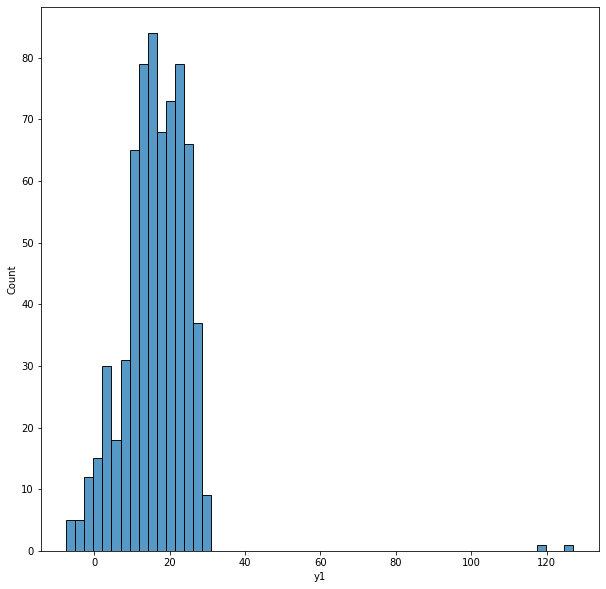

In [61]:
plt.figure(figsize=(10,10))
sns.histplot(y1);

In [26]:
y2.sort_values(ascending=False).head(20)

184    314421.44
349    314221.48
357    265216.60
148    246014.64
1      235413.64
612      3286.60
120      2886.46
95        127.12
225       118.66
64         30.90
150        30.70
25         30.64
307        30.50
61         30.22
537        29.82
510        29.82
65         29.76
626        29.54
70         29.44
143        29.00
Name: y2, dtype: float64

In [27]:
y1.sort_values(ascending=False).head(20)

95     127.12
225    118.66
61      30.22
150     30.18
25      29.98
307     29.88
537     29.82
64      29.22
510     29.14
70      28.94
626     28.82
502     28.36
181     28.36
394     28.16
143     28.14
411     28.14
448     28.12
98      28.10
245     28.08
653     28.00
Name: y1, dtype: float64

In [32]:
y2_drop = y2.drop(labels=[184, 349, 357, 148, 1, 612, 120])
y2_drop

0      26.44
2       0.98
3      24.04
4      -6.00
5      23.52
       ...  
673    18.68
674    22.44
675    17.82
676    25.32
677    -0.18
Name: y2, Length: 671, dtype: float64

In [28]:
y1.loc[[184, 349, 357, 148, 1, 612, 120]]

184    21.32
349    20.86
357    16.50
148    14.54
1      12.76
612    22.90
120    18.90
Name: y1, dtype: float64

In [69]:
# удаляем строки с аномально большими y2
train_data_replace_drop = train_data_replace.drop(index=[184, 349, 357, 148, 1, 612, 120, 95, 225])

In [70]:
train_data_replace_drop.describe()

,0,1,y1,y2
count,669.000000,669.000000,669.000000,669.000000
mean,1524.887892,2.101644,16.049955,16.492227
std,878.022138,3.057603,7.683085,7.732327
min,1.000000,0.000000,-7.400000,-7.400000
25%,761.000000,0.000000,11.360000,11.660000
50%,1604.000000,1.000000,16.440000,16.880000
75%,2286.000000,3.000000,22.140000,22.440000
max,2999.000000,17.000000,30.220000,30.900000


In [72]:
train_data_replace_drop.describe(include="object")

,2,3,4,5,6,7,8,9,10,11,...,42,43,44,45,46,47,48,49,50,51
count,660,647,632,617,589,571,541,520,484,451,...,74,68,66,62,57,53,52,51,49,48
unique,482,487,469,474,462,443,434,413,392,361,...,71,64,61,58,56,52,50,50,48,46
top,0.18,1.42,17.8,6.12,19.66,16.36,23.62,10.0,4.0,20.3,...,22.04,29.3,20.72,26.72,16.22,27.66,24.94,16.24,22.06,26.02
freq,11,10,6,5,6,4,4,4,4,4,...,2,2,2,3,2,2,2,2,2,2


In [73]:
train_data_replace_drop["y2-y1"] = train_data_replace_drop["y2"] - train_data_replace_drop["y1"]

In [74]:
train_data_replace_drop["y2-y1"]

0      0.36
2      0.76
3      1.04
4      0.16
5      0.66
       ... 
673    0.24
674    1.72
675    0.02
676    0.58
677    0.30
Name: y2-y1, Length: 669, dtype: float64

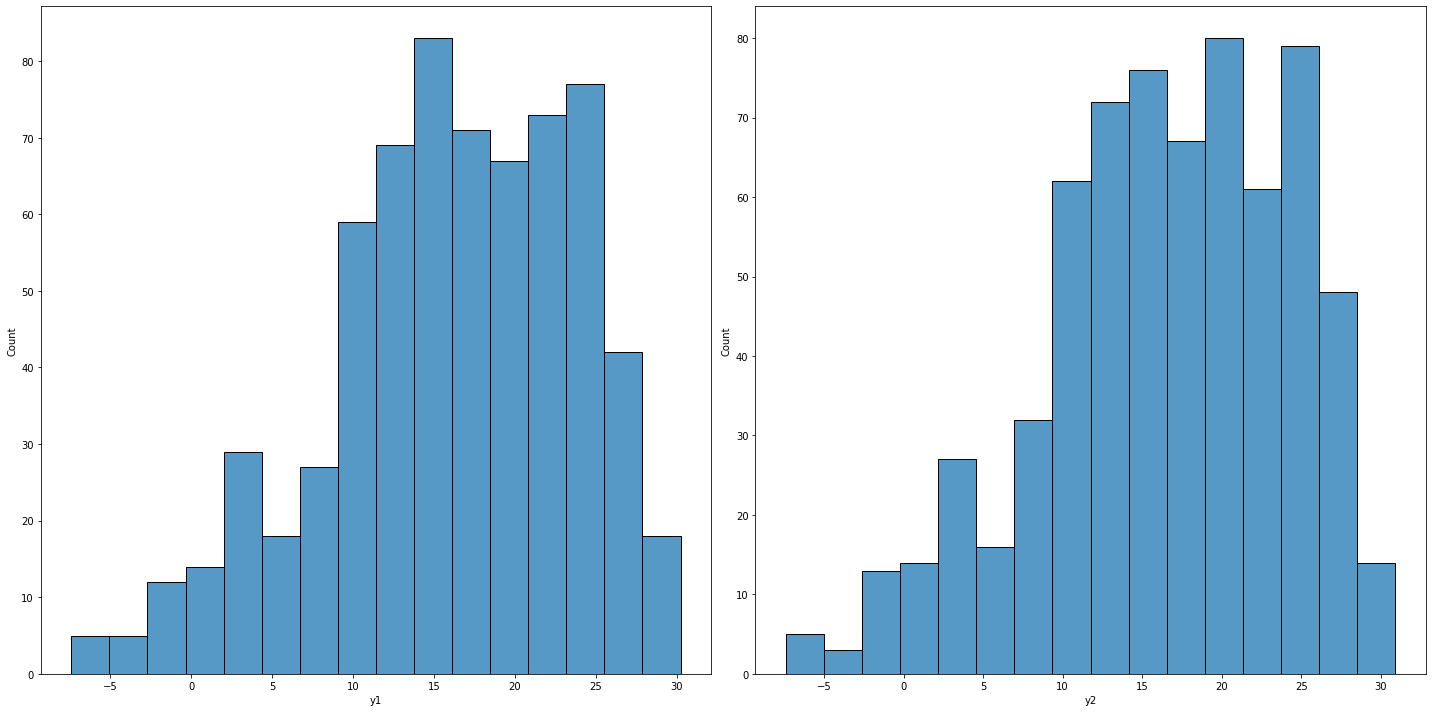

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 10)
sns.histplot(train_data_replace_drop["y1"], ax=ax1)
sns.histplot(train_data_replace_drop["y2"], ax=ax2)
plt.tight_layout()

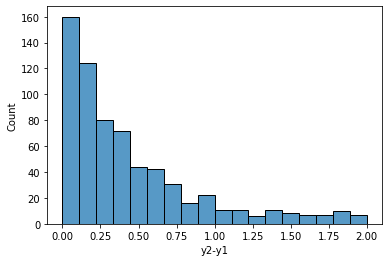

In [76]:
sns.histplot(train_data_replace_drop["y2-y1"]);

In [91]:
train_data_replace_drop["y2-y1"].value_counts().head(60)

0.00    37
0.02    21
0.16    21
0.14    19
0.18    17
0.12    13
0.20    12
0.34    11
0.08    11
0.06    11
0.04    11
0.32    10
0.28    10
0.50    10
0.24     9
0.66     9
0.08     9
0.48     8
0.42     7
0.10     7
0.22     7
0.44     7
0.72     7
0.06     7
0.04     6
0.64     6
0.46     6
0.36     6
0.26     6
0.70     6
0.42     5
0.28     5
0.24     5
0.26     5
0.40     5
0.10     5
0.08     5
0.26     5
0.30     5
0.98     5
0.62     5
0.10     5
0.30     4
0.02     4
0.90     4
0.12     4
0.40     4
0.12     4
0.22     4
0.06     4
0.52     4
0.92     4
0.38     4
1.42     4
1.84     3
1.36     3
0.06     3
0.14     3
0.96     3
0.14     3
Name: y2-y1, dtype: int64

In [78]:
train_data_replace_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 677
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       669 non-null    float64
 1   1       669 non-null    float64
 2   2       660 non-null    object 
 3   3       647 non-null    object 
 4   4       632 non-null    object 
 5   5       617 non-null    object 
 6   6       589 non-null    object 
 7   7       571 non-null    object 
 8   8       541 non-null    object 
 9   9       520 non-null    object 
 10  10      484 non-null    object 
 11  11      451 non-null    object 
 12  12      422 non-null    object 
 13  13      393 non-null    object 
 14  14      365 non-null    object 
 15  15      344 non-null    object 
 16  16      315 non-null    object 
 17  17      295 non-null    object 
 18  18      278 non-null    object 
 19  19      259 non-null    object 
 20  20      241 non-null    object 
 21  21      225 non-null    object 
 22  22

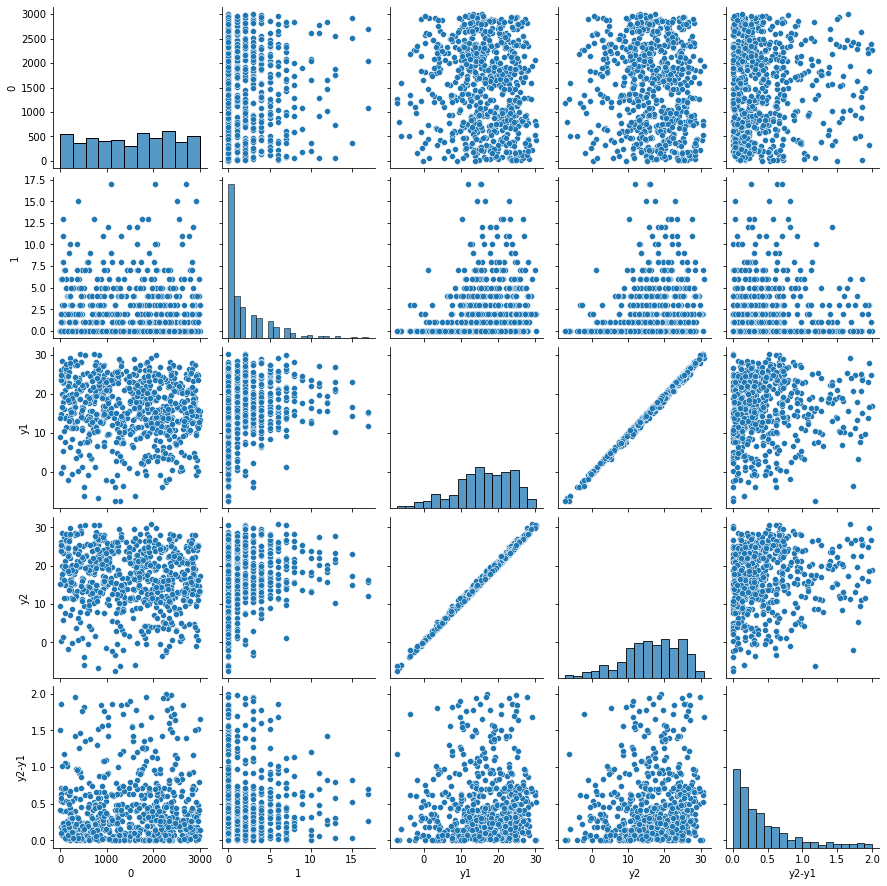

In [82]:
sns.pairplot(data=train_data_replace_drop);

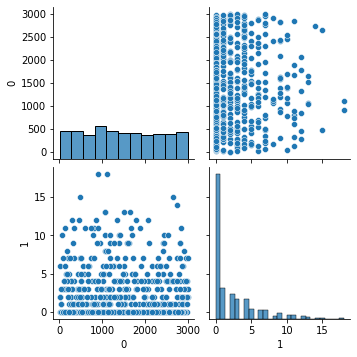

In [83]:
sns.pairplot(data=test_data)

In [98]:
train_data_replace_drop.notna().sum(axis=0)

0        669
1        669
2        660
3        647
4        632
5        617
6        589
7        571
8        541
9        520
10       484
11       451
12       422
13       393
14       365
15       344
16       315
17       295
18       278
19       259
20       241
21       225
22       210
23       202
24       190
25       178
26       167
27       152
28       144
29       135
30       130
31       126
32       123
33       115
34       110
35       108
36        98
37        92
38        89
39        85
40        80
41        75
42        74
43        68
44        66
45        62
46        57
47        53
48        52
49        51
50        49
51        48
y1       669
y2       669
y2-y1    669
dtype: int64

In [104]:
train_data_replace_drop[train_data_replace_drop.notna().all(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,y1,y2,y2-y1
30,2398.0,0.0,19.06,19.06,19.2,19.22,2.0,16.92,16.98,18.78,...,19.06,19.1,19.12,19.22,19.24,19.26,19.28,3.88,4.86,0.98
44,2465.0,5.0,11.32,10.7,11.74,11.32,10.7,11.34,11.74,10.26,...,10.8,11.32,11.34,11.36,11.4,11.42,11.42,10.70,11.74,1.04
48,505.0,0.0,15.06,16.46,17.8,17.84,21.38,20.06,24.2,26.1,...,17.8,23.1,24.04,25.88,25.9,25.92,26.6,7.64,9.46,1.82
52,2082.0,7.0,14.32,15.44,14.14,14.32,14.3,14.0,14.24,14.4,...,15.8,14.5,14.72,14.78,14.8,14.84,14.9,14.32,15.44,1.12
58,2012.0,6.0,25.8,25.3,24.94,25.8,25.3,25.72,25.24,25.3,...,27.28,25.76,26.62,24.94,25.84,12.04,10.4,25.30,25.80,0.50
74,1679.0,0.0,17.54,17.64,17.72,17.72,17.74,17.72,17.74,17.54,...,18.68,17.44,18.4,18.34,18.1,19.22,18.44,17.72,18.68,0.96
77,1006.0,7.0,21.74,21.84,21.32,22.64,21.74,22.64,21.84,27.18,...,22.5,22.42,22.12,22.88,21.84,22.42,21.84,21.84,21.98,0.14
81,20.0,0.0,26.08,26.3,26.1,25.98,26.04,25.38,25.98,26.08,...,26.3,4.0,26.4,26.42,26.52,26.08,26.02,26.10,26.28,0.18
141,1746.0,13.0,21.18,20.68,21.18,20.68,20.72,20.96,20.9,20.92,...,21.08,21.18,21.18,21.14,20.68,21.76,8.32,21.18,21.76,0.58
149,1478.0,12.0,15.44,15.58,15.8,15.82,15.08,15.06,15.06,15.28,...,16.04,15.68,16.16,15.52,15.72,15.8,16.12,15.58,15.80,0.22


In [103]:
train_data_replace_drop.notna().all(axis=1)

0      False
2      False
3      False
4      False
5      False
       ...  
673    False
674    False
675    False
676    False
677    False
Length: 669, dtype: bool

<AxesSubplot:ylabel='Count'>

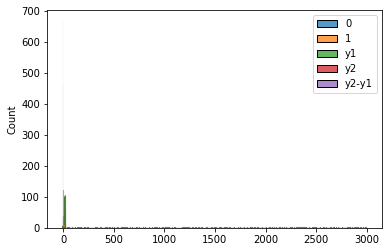

In [109]:
sns.histplot(data=train_data_replace_drop.replace(np.NaN, 0))

In [118]:
train_data_replace_drop.replace(np.NaN, 0).convert_dtypes()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,y1,y2,y2-y1
0,1816,1,26.08,25.44,25.44,25.58,26.14,26.16,26.16,26.24,...,0,0,0,0,0,0,0,26.08,26.44,0.36
2,1821,0,0.22,0.98,0.22,0.98,0.22,0.18,1.42,4.74,...,0,0,0,0,0,0,0,0.22,0.98,0.76
3,137,0,23.44,24.04,23.0,23.78,23.8,24.0,23.44,22.94,...,23.0,24.04,22.06,22.06,24.14,0,0,23.0,24.04,1.04
4,1598,0,27.62,26.82,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,-6.16,-6.0,0.16
5,2170,1,15.64,18.74,16.12,16.32,16.34,16.36,16.38,16.4,...,0,0,0,0,0,0,0,22.86,23.52,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,162,0,18.44,18.1,19.22,18.4,18.48,18.7,18.76,18.8,...,0,0,0,0,0,0,0,18.44,18.68,0.24
674,2434,0,18.58,23.16,25.4,26.22,27.0,27.8,27.84,3.6,...,0,0,0,0,0,0,0,20.72,22.44,1.72
675,2659,1,16.82,17.58,17.8,17.82,16.64,16.82,16.86,16.92,...,0,0,0,0,0,0,0,17.8,17.82,0.02
676,21,2,24.08,24.66,24.74,23.54,24.06,24.18,24.38,24.5,...,0,0,0,0,0,0,0,24.74,25.32,0.58


In [125]:
fit_alpha, fit_loc, fit_beta = sp.stats.gamma.fit(train_data_replace_drop["y2-y1"].values)
fit_alpha, fit_loc, fit_beta

(0.5685290988161731, -1.1797421099246545e-30, 0.4467958856791848)

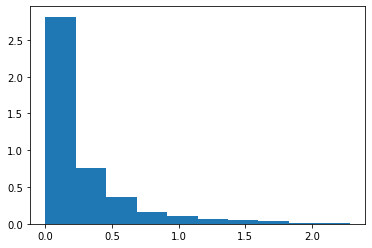

In [128]:
r = sp.stats.gamma.rvs(fit_alpha, fit_loc, fit_beta, 1000)
plt.hist(r, density=True);

In [154]:
train_data_replce_drop_loc = train_data_replace_drop.loc[:, :"16"]
train_df_fillna = train_data_replce_drop_loc[train_data_replce_drop_loc.notna().all(axis=1)]
train_df_fillna.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [139]:
test_datatest_data_replace.loc[:, :"16"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2673.0,0.0,11.06,11.14,11.14,11.28,11.3,11.46,11.54,11.06,11.74,11.06,NaN,NaN,NaN,NaN,NaN
1,1967.0,0.0,20.82,23.8,9.0,22.0,24.32,25.6,21.12,25.08,21.16,24.32,24.7,27.02,27.06,14.56,27.9
2,2602.0,0.0,18.66,17.74,18.28,18.4,17.36,17.56,17.76,18.22,18.66,17.7,17.7,17.74,17.9,18.22,18.2
3,2808.0,2.0,4.0,3.74,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,731.0,0.0,29.46,28.92,28.94,29.48,29.6,28.92,28.92,28.12,28.94,26.18,29.48,29.5,26.18,29.58,29.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2810.0,3.0,21.78,22.06,21.48,21.78,21.48,22.0,21.8,21.8,21.84,21.86,21.82,21.84,21.88,21.9,21.9
674,1212.0,0.0,16.38,15.72,15.78,16.04,16.1,16.24,16.26,16.3,16.34,16.34,16.38,16.4,15.92,15.48,16.38
675,1727.0,0.0,4.22,4.26,4.22,4.26,4.26,4.22,4.26,4.22,4.26,NaN,NaN,NaN,NaN,NaN,NaN
676,2861.0,2.0,26.12,26.52,25.68,26.36,26.38,26.48,26.34,26.76,26.28,26.3,26.88,26.2,26.3,26.7,26.72


In [176]:
df_fill_na = train_data_replace_drop.fillna(value=0)

In [162]:
df_fill_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 677
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       669 non-null    float64
 1   1       669 non-null    float64
 2   2       669 non-null    float32
 3   3       669 non-null    object 
 4   4       669 non-null    object 
 5   5       669 non-null    object 
 6   6       669 non-null    object 
 7   7       669 non-null    object 
 8   8       669 non-null    object 
 9   9       669 non-null    object 
 10  10      669 non-null    object 
 11  11      669 non-null    object 
 12  12      669 non-null    object 
 13  13      669 non-null    object 
 14  14      669 non-null    object 
 15  15      669 non-null    object 
 16  16      669 non-null    object 
 17  17      669 non-null    object 
 18  18      669 non-null    object 
 19  19      669 non-null    object 
 20  20      669 non-null    object 
 21  21      669 non-null    object 
 22  22

In [178]:
for i in range(2, 52):
    df_fill_na[str(i)] = pd.to_numeric(df_fill_na[str(i)], downcast="float")

In [179]:
df_fill_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 677
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       669 non-null    float64
 1   1       669 non-null    float64
 2   2       669 non-null    float32
 3   3       669 non-null    float32
 4   4       669 non-null    float32
 5   5       669 non-null    float32
 6   6       669 non-null    float32
 7   7       669 non-null    float32
 8   8       669 non-null    float32
 9   9       669 non-null    float32
 10  10      669 non-null    float32
 11  11      669 non-null    float32
 12  12      669 non-null    float32
 13  13      669 non-null    float32
 14  14      669 non-null    float32
 15  15      669 non-null    float32
 16  16      669 non-null    float32
 17  17      669 non-null    float32
 18  18      669 non-null    float32
 19  19      669 non-null    float32
 20  20      669 non-null    float32
 21  21      669 non-null    float32
 22  22

In [189]:
for i in range(1, 52):
    df_fill_na_i = df_fill_na[str(i)]
    sample_i = df_fill_na_i[df_fill_na_i != float(0)].values
    print(sp.stats.ks_2samp(sample_i, df_fill_na["y1"]))

KstestResult(statistic=0.7675108949662098, pvalue=1.0738312550933268e-143)
KstestResult(statistic=0.0343796711509716, pvalue=0.8082795073841179)
KstestResult(statistic=0.03587443946188341, pvalue=0.7713278757619746)
KstestResult(statistic=0.040271234224517984, pvalue=0.6466937464498097)
KstestResult(statistic=0.03844243688419543, pvalue=0.7094682491848032)
KstestResult(statistic=0.04588862580289868, pvalue=0.5048952820543844)
KstestResult(statistic=0.0584556504074618, pvalue=0.23111823550888133)
KstestResult(statistic=0.07177098270655294, pvalue=0.08618471389061289)
KstestResult(statistic=0.08607853282741175, pvalue=0.02425769758423879)
KstestResult(statistic=0.10316372036714475, pvalue=0.004614509637512754)
KstestResult(statistic=0.11364547807728383, pvalue=0.0017071934796630828)
KstestResult(statistic=0.13378176382660686, pvalue=0.00016597941550433593)
KstestResult(statistic=0.16339757413936717, pvalue=3.014109379195773e-06)
KstestResult(statistic=0.17947457870057537, pvalue=3.954967

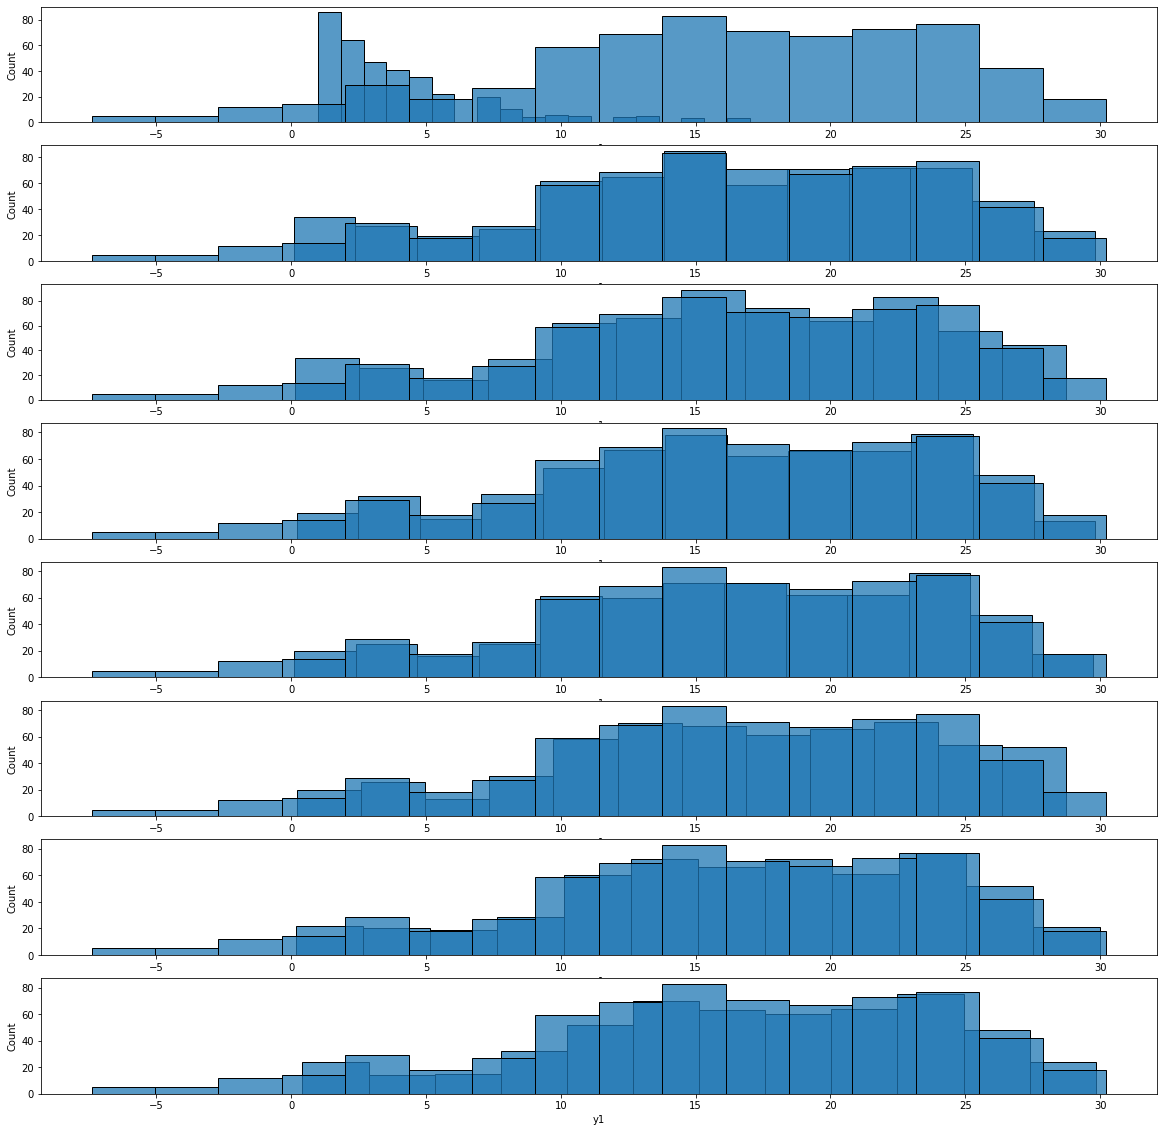

In [196]:
fig, a = plt.subplots(8, 1)
fig.set_size_inches(20, 20)
for i in range(1, 9):
    a_i = a[i - 1]
    df_fill_na_i = df_fill_na[str(i)]
    sample_i = df_fill_na_i[df_fill_na_i != float(0)].values
    sns.histplot(sample_i, ax=a_i)
    sns.histplot(df_fill_na["y1"], ax=a_i)

In [200]:
df_fill_na[["2", "3", "4", "y1"]].sort_values(by="y1")

,2,3,4,y1
649,0.180000,1.420000,4.740000,-7.40
640,0.180000,1.420000,4.740000,-7.38
72,0.180000,1.420000,4.740000,-6.84
574,0.180000,1.420000,4.740000,-6.16
4,27.620001,26.820000,4.000000,-6.16
...,...,...,...,...
537,29.820000,28.740000,29.820000,29.82
307,19.200001,18.219999,19.000000,29.88
25,27.059999,27.360001,27.059999,29.98
150,29.799999,0.000000,0.000000,30.18


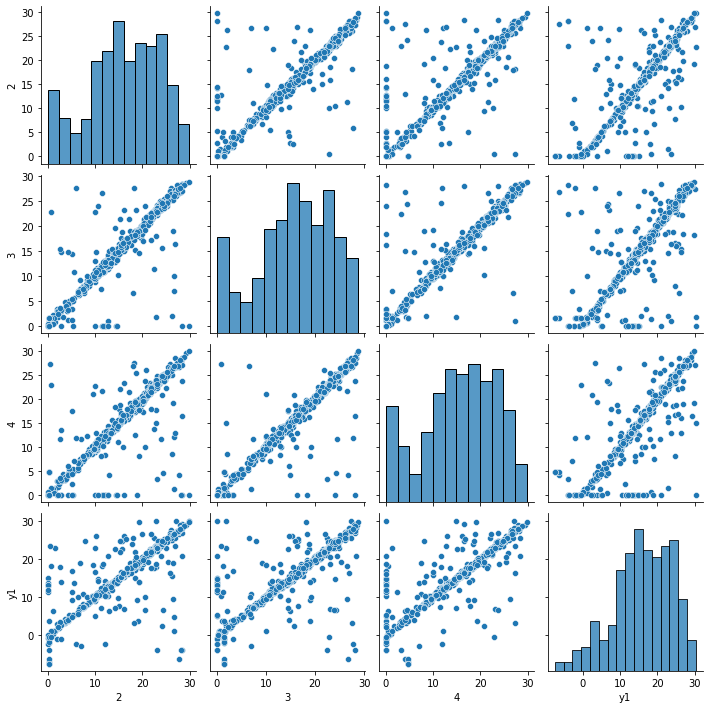

In [202]:
sns.pairplot(df_fill_na[["2", "3", "4", "y1"]]);

In [174]:
df_fill_na.isna().sum().sum()

0

In [180]:
df_fill_na

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,y1,y2,y2-y1
0,1816.0,1.0,26.080000,25.440001,25.440001,25.580000,26.139999,26.160000,26.160000,26.240000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,26.08,26.44,0.36
2,1821.0,0.0,0.220000,0.980000,0.220000,0.980000,0.220000,0.180000,1.420000,4.740000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.22,0.98,0.76
3,137.0,0.0,23.440001,24.040001,23.000000,23.780001,23.799999,24.000000,23.440001,22.940001,...,23.0,24.040001,22.059999,22.059999,24.139999,0.0,0.0,23.00,24.04,1.04
4,1598.0,0.0,27.620001,26.820000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-6.16,-6.00,0.16
5,2170.0,1.0,15.640000,18.740000,16.120001,16.320000,16.340000,16.360001,16.379999,16.400000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,22.86,23.52,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,162.0,0.0,18.440001,18.100000,19.219999,18.400000,18.480000,18.700001,18.760000,18.799999,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.44,18.68,0.24
674,2434.0,0.0,18.580000,23.160000,25.400000,26.219999,27.000000,27.799999,27.840000,3.600000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,20.72,22.44,1.72
675,2659.0,1.0,16.820000,17.580000,17.799999,17.820000,16.639999,16.820000,16.860001,16.920000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.80,17.82,0.02
676,21.0,2.0,24.080000,24.660000,24.740000,23.540001,24.059999,24.180000,24.379999,24.500000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,24.74,25.32,0.58


In [183]:
df_fill_na[str(5)]

0      25.580000
2       0.980000
3      23.780001
4       0.000000
5      16.320000
         ...    
673    18.400000
674    26.219999
675    17.820000
676    23.540001
677     0.000000
Name: 5, Length: 669, dtype: float32

In [186]:
df_fill_na_i = df_fill_na[str(5)]
sample_i = df_fill_na_i[df_fill_na_i != float(0)].values

In [187]:
sample_i

array([25.58,  0.98, 23.78, 16.32, 15.98, 13.32, 13.58, 11.48, 20.26,
       16.58, 12.74,  9.26, 23.3 , 23.86, 15.64, 26.24, 15.24, 11.36,
        8.78,  4.28, 16.3 , 27.06,  7.76, 23.98, 15.74, 11.32, 19.22,
       11.74,  8.88, 22.34, 25.14, 17.96, 10.04, 23.62, 10.92, 23.66,
       24.22, 18.7 , 17.2 , 24.02, 11.32, 16.32, 25.22, 10.9 , 17.84,
       11.36,  7.9 , 14.92, 14.32, 25.1 , 11.9 , 21.42, 17.74, 11.28,
       25.8 , 23.26, 22.14, 12.78, 26.36, 21.44, 28.28, 12.34,  2.26,
        4.2 ,  0.24,  6.12, 16.72, 17.72, 24.7 , 17.6 , 22.64, 25.48,
       20.06, 17.7 , 25.98,  4.3 , 20.8 , 17.7 , 27.56, 27.86, 27.76,
       18.02, 24.  , 10.26, 18.4 ,  4.82, 18.08, 22.06, 27.7 , 26.12,
       21.12, 20.56,  0.54, 16.28, 12.36, 14.84, 19.16, 19.46, 21.26,
       17.92, 15.16, 13.54, 11.4 , 21.78, 21.54, 17.6 , 23.46,  9.94,
       13.9 , 22.8 , 22.02, 14.82, 12.84, 26.84, 26.54,  2.82, 21.02,
       18.22, 19.76, 18.98, 16.66, 17.46, 20.26, 26.52, 22.92, 13.78,
       13.2 , 20.68,